# Worksheet 1 - Scientific Visualisation MVE080/MMG640
## Basics in Python, Jupyter, plotnine and how to visualize amounts

Name of all the group members: ___Elis Åhlund, Erik Dagobert, Yixuan Pan

This is the first worksheet in the course *Scientific Visualisation*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualisations using plotnine. Once you have finished all the tasks, export this document as an HTML file and upload it in Canvas. 

The goal of these homeworks is to learn how to improve your skills in visualising your science. You solve the homeworks in groups, however annotate all the code (even the theoretical parts) with who solved each question. **Eventhough the homework is submitted as a group you will be *individually* evaluated**. Motivate your choice of graph, legend, colourmap etc below your graph in a separate cell. 

Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. 

Throughout the assignment you shall use a Python workflow.
If you are completely new to Python, take a look at [this page](pythonbasics.org).
Python can do essentially all that MATLAB can, plus more. 
In this course we shall use Python in different contexts, starting with the [Jupyter Notebook interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html). 

Matrices and arrays are handled through the NumPy module. [Learn here](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) how NumPy is different from MATLAB.

The below loads the packages required for this homework.

In [2]:
import numpy as np
import pandas as pd
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 1-3 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1
Describe the visualisation concept _scales_. 

### Answer 1.1
_Your answer here_

#Yixuan:
Scales are used to map data values to aesthetic values. A scale can be a position scale, a shape scale, or a color scale, but it must be one-to-one. This means that for every specific data value, there is exactly one corresponding aesthetic value. Otherwise, data visualization would become unclear. 

### Question 1.2
In Figures 2.3 and 2.4, the same data is visualised in two different ways. Discuss the pros and cons of the two approaches. Which one do you prefer and why?

### Answer 1.2
_Your answer here_

#Yixuan:
Figure 2.3 clearly shows the temperature variation trends of different cities over a year, with different colors facilitating comparison. However, the x-axis is not labeled by month, making it difficult to pinpoint the temperature on a specific date. Additionally, if too many cities are included, the chart may appear cluttered. In Figure 2.4 we can relatively quickly identify low and high data values. Mapping makes quantitative sense. However, it lacks sensitivity to specific data, making it difficult to interpret accurate values from the colors. Especially the values in the middle.
### Question 1.3
Describe situations when _nonlinear axes_ might be useful.
When should they not be used?

### Answer 1.3
_Your answer here_

#Yixuan:
The most commonly used nonlinear scale is the logarithmic scale, or log scale. It is typically used when the dataset contains numbers that vary greatly in magnitude.

### Question 1.4
In which situations could a _polar coordinate system_ be useful? 

### Answer 1.4
_Your answer here_

#Yixuan:
Polar coordinates are often used for periodic data because data values at one end of the scale can be logically  joined to data values at the other end. Additionally, geospatial data such as maps, being spherical, would be misleading to plot latitude and longitude using a Cartesian coordinate system,therefore, polar coordinates are preferred.

## Task 2 - Tidy data, ggplot and distributions

Several graphics libraries such as ggplot2 and plotnine are at their best when the provided data is tidy. However, data is often not provided in a tidy format, hence being able to transform non-tidy data into tidy data is a crucial skill. 

### Question 2.1 

In the lecture 1, I provided a small non-tidy dataset (code below).

In [3]:
data1 = pd.DataFrame({"Site" : ["Stockholm", "Gothenburg", "London"], 
                      "1999" : [13, 85, 77], 
                      "2000" : [21, 31, 15]})
data1

,Site,1999,2000
0,Stockholm,13,21
1,Gothenburg,85,31
2,London,77,15


Transform this small dataset into a tidy dataset. Print the table below (as I did above). 

*Hint* [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

In [4]:
# Write you answer here
#Yixuan
pd.melt(data1, id_vars=['Site'], value_vars=['1999', '2000'],var_name='year', value_name='cases').sort_values('Site')

,Site,year,cases
1,Gothenburg,1999,85
4,Gothenburg,2000,31
2,London,1999,77
5,London,2000,15
0,Stockholm,1999,13
3,Stockholm,2000,21


### Question 2.2

Datasets are often bigger than above. I have made a subset of the weather data used in the lecture non-tidy (available on the webpage). 

Transform this dataset into a tidy dataset. Print the table below (as I did above)

In [5]:
# Write your answer here
#Yixuan
data2 = pd.read_csv('Weather_not_tidy.csv')
data3 = pd.melt(data2, id_vars=['month','day','hour_of_day'], value_vars=['Temp2009', 'Temp2010'],var_name='year', value_name='temperature')
data3['month'] = pd.Categorical(data3['month'],
                             categories=["Jan","Feb","Mar","Apr","May","Jun",
                                         "Jul","Aug","Sep","Oct","Nov","Dec"],
                             ordered=True)
data3.sort_values(['month','day','hour_of_day', 'year'])

,month,day,hour_of_day,year,temperature
0,Jan,1,12,Temp2009,-0.9
365,Jan,1,12,Temp2010,-6.4
1,Jan,2,12,Temp2009,-2.2
366,Jan,2,12,Temp2010,-6.6
2,Jan,3,12,Temp2009,4.2
...,...,...,...,...,...
727,Dec,29,12,Temp2010,-10.6
363,Dec,30,12,Temp2009,-5.5
728,Dec,30,12,Temp2010,-3.0
364,Dec,31,12,Temp2009,-8.1


In [6]:
# Erik
data2 = pd.read_csv('Weather_not_tidy.csv')

data2Tidy = pd.melt(data2,
                     id_vars= ["month", "day", "hour_of_day"],
                     value_vars=["Temp2009", "Temp2010"],
                     var_name="year",
                     value_name="temperature"
                   )
# Clean up name of year:
data2Tidy["year"] = data2Tidy["year"].apply(lambda x : x[4:8])
data2Tidy

,month,day,hour_of_day,year,temperature
0,Jan,1,12,2009,-0.9
1,Jan,2,12,2009,-2.2
2,Jan,3,12,2009,4.2
3,Jan,4,12,2009,-4.7
4,Jan,5,12,2009,-7.8
...,...,...,...,...,...
725,Dec,27,12,2010,-6.8
726,Dec,28,12,2010,-11.0
727,Dec,29,12,2010,-10.6
728,Dec,30,12,2010,-3.0


## Distributions

For this part reading Chapter 7 and 9 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) helps.

## Question 3.1

The benefit with tidy data is that it is easy to work with. For this task, use the tidy weather dataset from above and choose three months and by **a density and histogram plot** visualise the differences in temperature between 2009 and 2010 for the chosen months in a readable manner. Make sure to print the visuals below. 

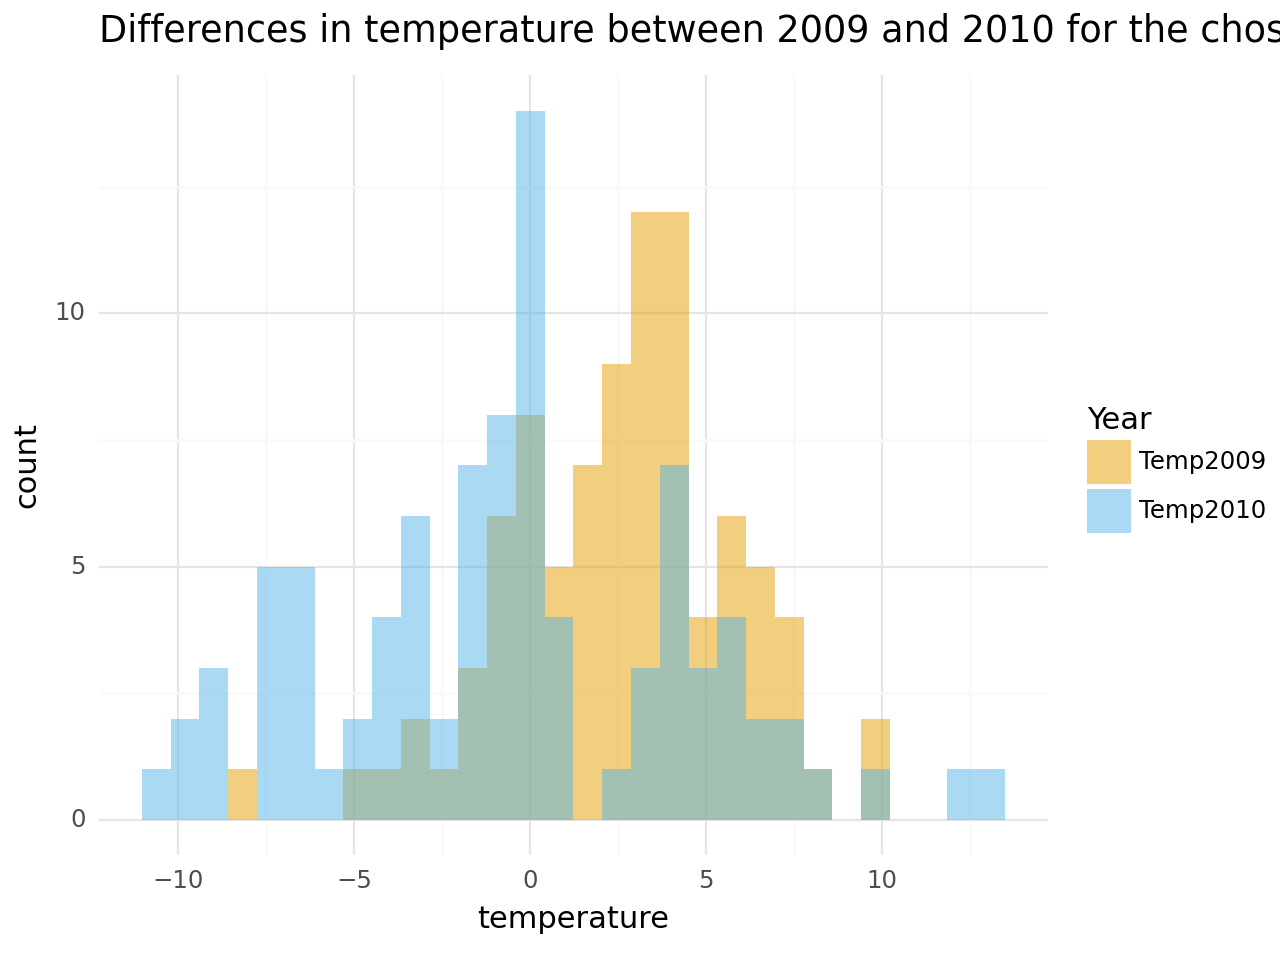

<Figure Size: (640 x 480)>

In [7]:
# Insert code here for histogram
#Yixuan
import matplotlib.pyplot as plt

chosen_months = ["Jan", "Feb", "Mar"]
data4 = data3[data3["month"].isin(chosen_months)]



p1 = (ggplot(data4, aes("temperature", fill="year"))
    + geom_histogram(bins=30, alpha=0.5, position = "identity")
    + scale_fill_manual(values=cbPalette, name = "Year")
    + labs(x = "temperature", title = "Differences in temperature between 2009 and 2010 for the chosen months")
    + theme_minimal())
p1
# Remember to print the visual 

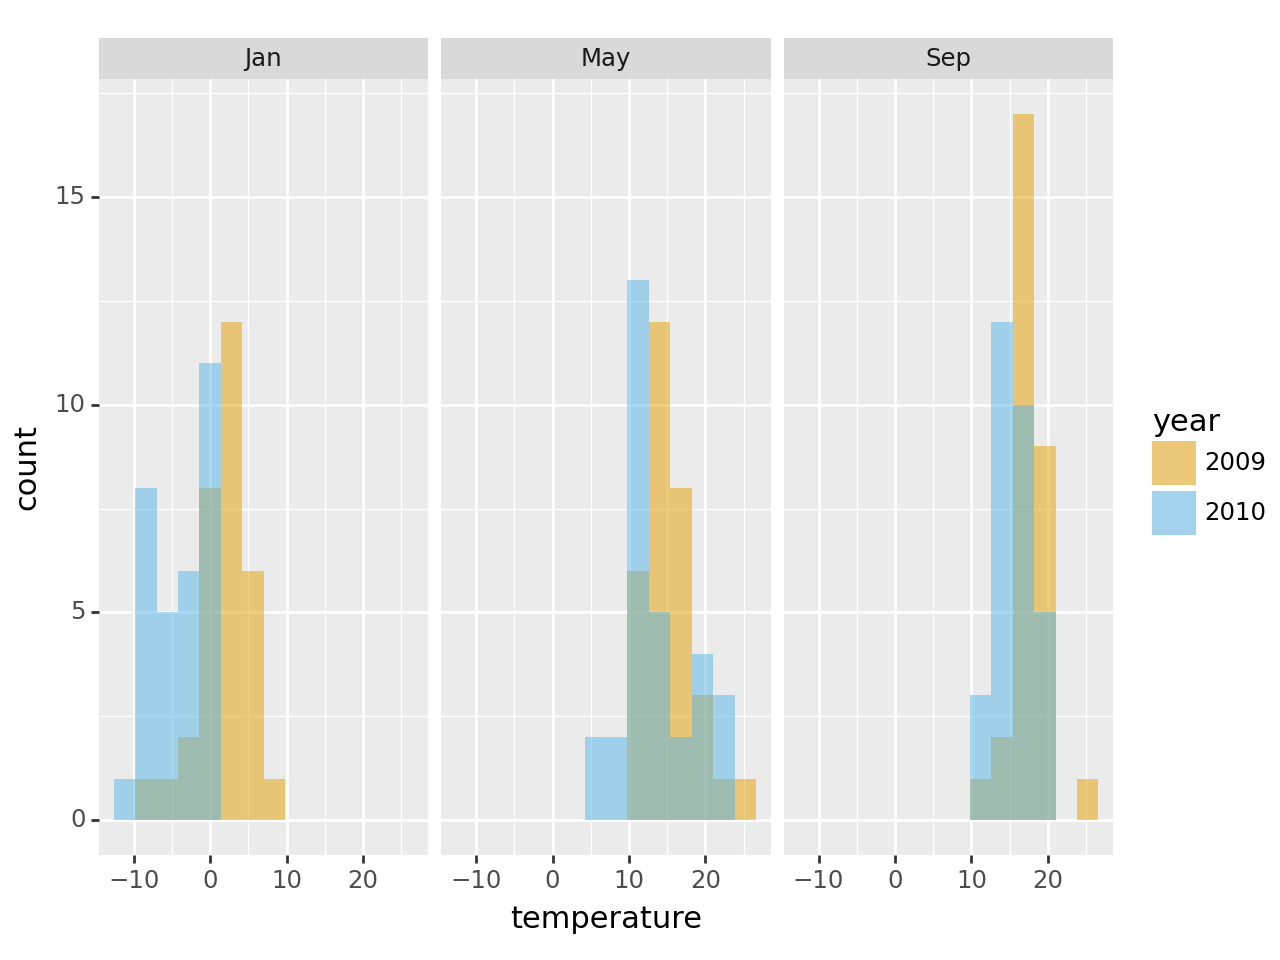

<Figure Size: (640 x 480)>

In [8]:
# Erik

d2Sel = data2Tidy.loc[:, ["month", "year", "temperature"]]

d2Sel = d2Sel[(d2Sel.month == "Jan") | (d2Sel.month == "May") | (d2Sel.month == "Sep")]

(
    ggplot(d2Sel, aes(x="temperature", fill="year"))
    + geom_histogram(position = "identity", alpha = 0.5, binwidth = 2.8)
    + facet_wrap("month")
    + scale_fill_manual(values = cbPalette)
)


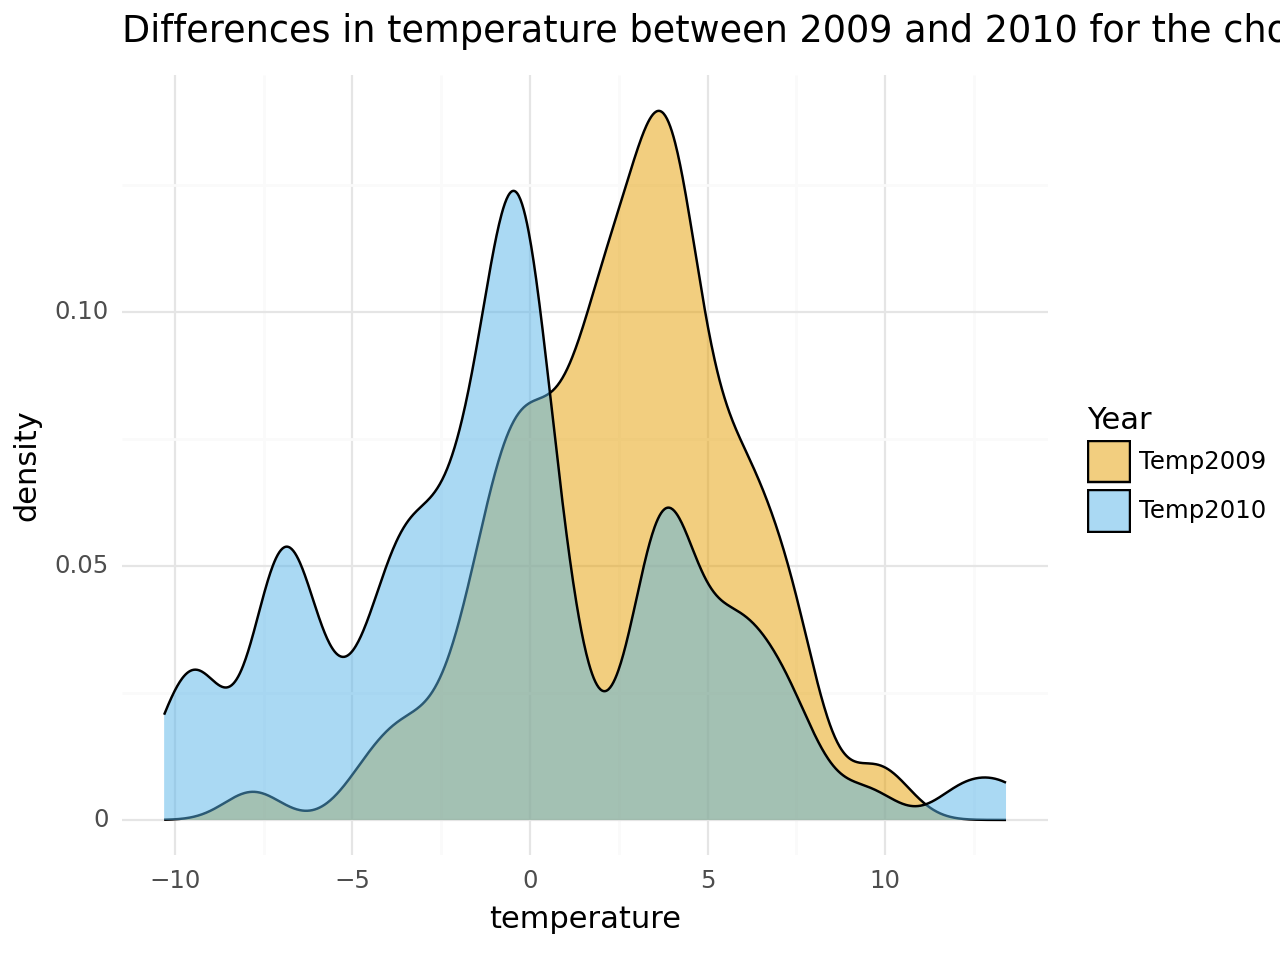

<Figure Size: (640 x 480)>

In [9]:
# Insert code here for density plot
#Yixuan
p2 = (ggplot(data4, aes("temperature", fill = "year"))
    + geom_density(aes(fill = "year"), alpha=0.5, bw=0.8)
    + scale_fill_manual(values=cbPalette, name = "Year")
    + labs(x = "temperature", title = "Differences in temperature between 2009 and 2010 for the chosen months")
    + theme_minimal())
p2
# Remember to print the visual 

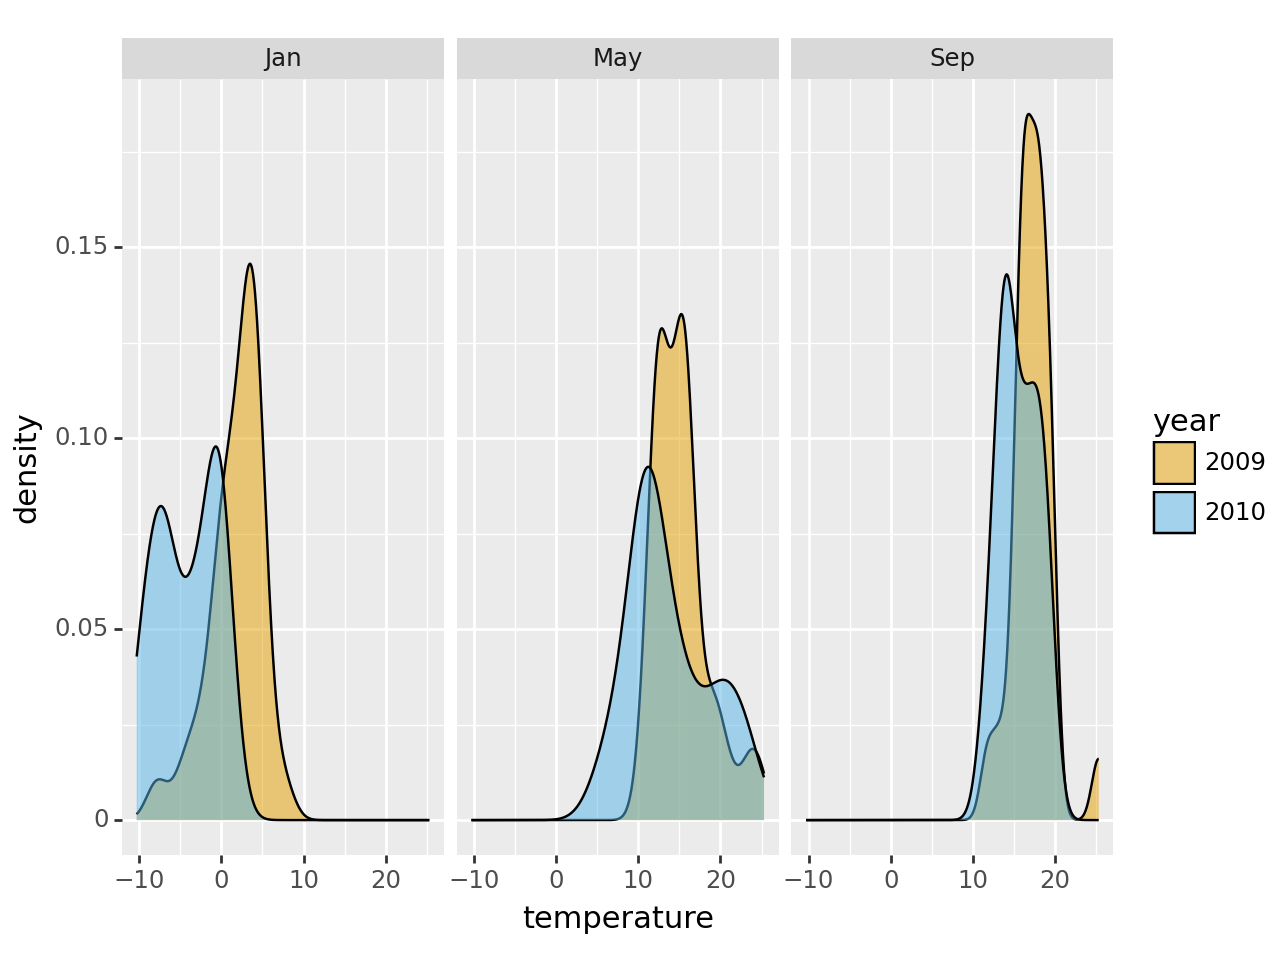

<Figure Size: (640 x 480)>

In [10]:
# Erik 

(
    ggplot(d2Sel, aes(x="temperature", fill="year"))
    + geom_density(kernel = "gaussian", position = "identity", alpha = 0.5)
    + facet_wrap("month")
    + scale_fill_manual(values = cbPalette)
)


**Provide a brief motivation for which plot (density and histogram) you find most readable and what you can conclude.**



_Your answer here_

#Yixuan:
Density plots are most readable, especially when data overlap, because the continuous density lines help distinguish different distributions.

### Question 3.2

In Lecture 2, I used boxplots, error-bars, and violin plots to visualise fluctuations in winter temperature in Västerås. Now using the weather data above, plot the temperature per month (like in Fig. 9.8 [here](https://clauswilke.com/dataviz/boxplots-violins.html)) using error bars, boxplots and violin plots with data points. For each month, plot the temperature for 2009 and 2010 next to each other (see example on webpage). 

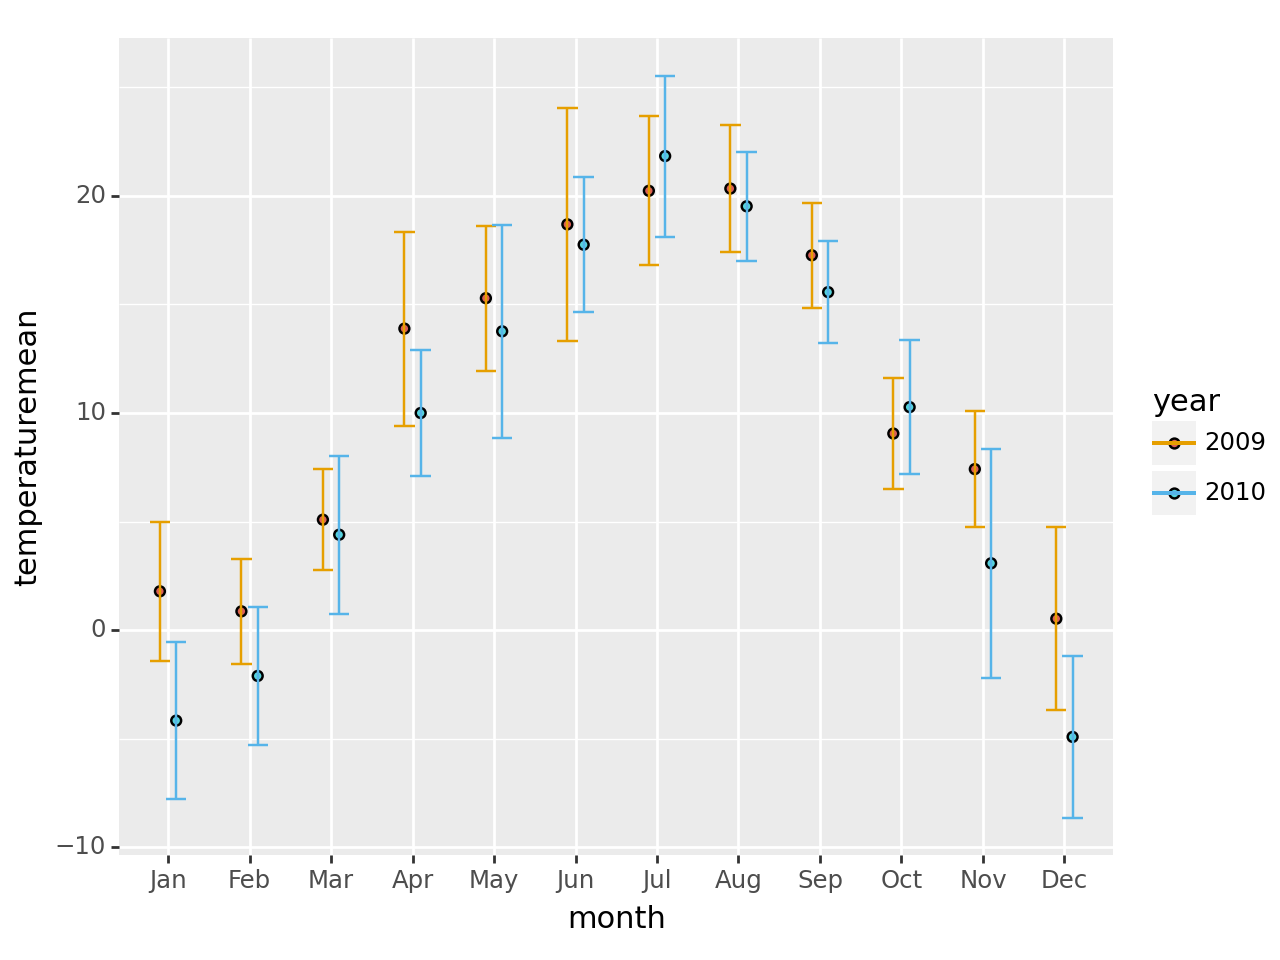

<Figure Size: (640 x 480)>

In [11]:
# Insert code here using standard error
# Erik

d2Sel2 = data2Tidy.loc[:, ["month", "year", "temperature"]]

# Sort the months in chronological order:
months = ["Jan", "Feb", "Mar", "Apr", 
          "May", "Jun", "Jul", "Aug", 
          "Sep", "Oct", "Nov", "Dec"]
d2Sel2["month"] = pd.Categorical(d2Sel2["month"], categories=months, ordered=True)
d2Sel2.sort_values(by="month",inplace=True)


# Calculate summary statistics:
sumd2 = d2Sel2[["month", "year", "temperature"]].groupby(["month", "year"]).agg(
    {
        "temperature": ["mean", "std"]
    }
)

sumd2["ymin"] = sumd2[("temperature", "mean")] - sumd2[("temperature", "std")]
sumd2["ymax"] = sumd2[("temperature", "mean")] + sumd2[("temperature", "std")]

# Get rid of multi-indexing:
sumd2 = sumd2.reset_index(level=[0,1])
sumd2.columns = [''.join(col) for col in sumd2.columns]



(
    ggplot(sumd2, aes("month", "temperaturemean", fill = "year"))
        + geom_point(position = position_dodge(width = .4))
        + geom_errorbar(aes(ymin="ymin", ymax="ymax", color = "year"), position = position_dodge(width = .4))
        + scale_color_manual(values = cbPalette)
)


# Remember to print the visual 

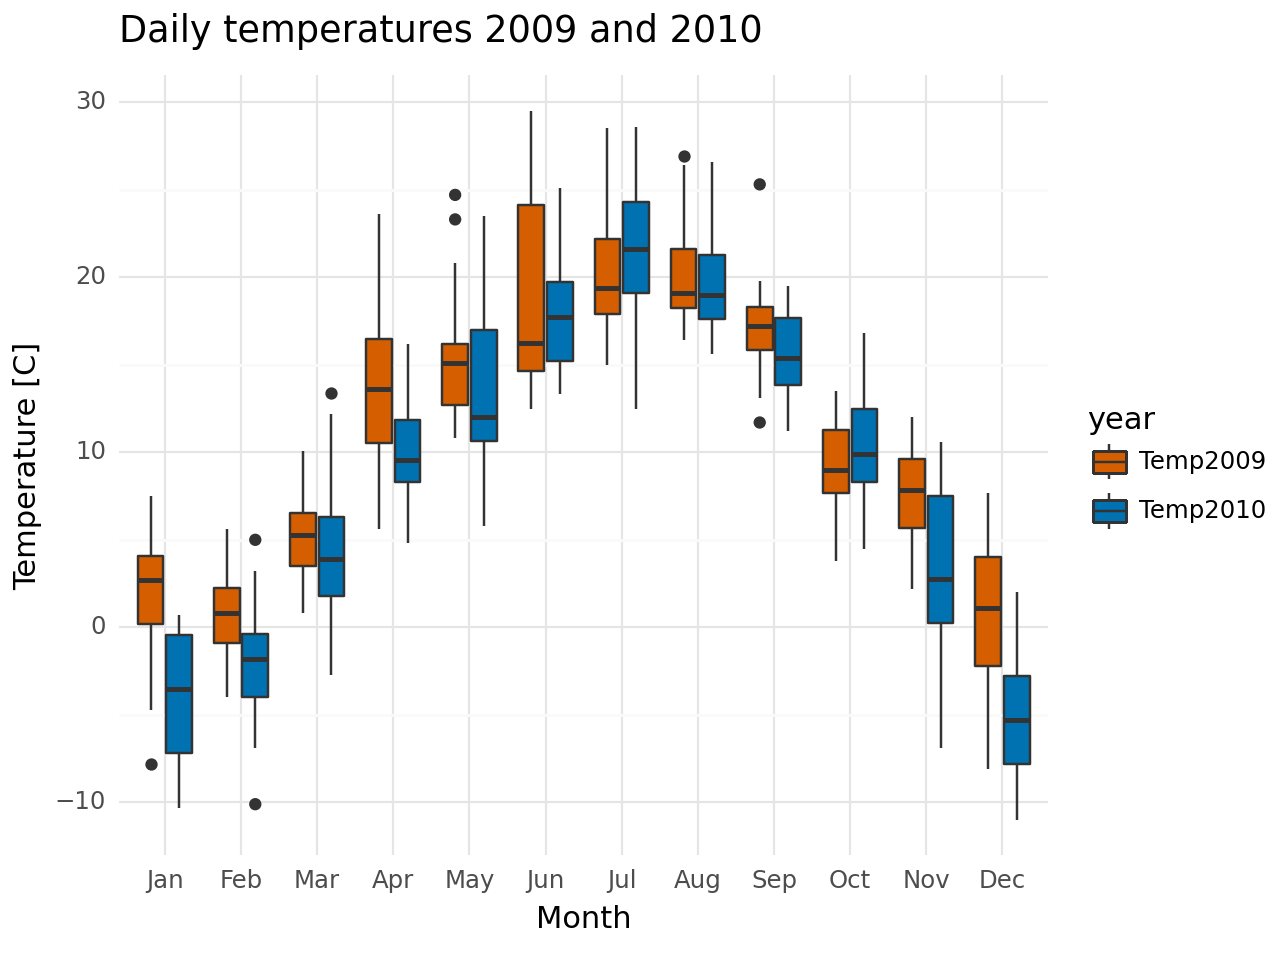

<Figure Size: (640 x 480)>

In [12]:
# Insert code here using boxplots
#Yixuan
p4 = (ggplot(data3, aes("month", "temperature",fill = "year"))
    + geom_boxplot()
    + labs(y = "Temperature [C]", x = "Month", title="Daily temperatures 2009 and 2010")
    + scale_fill_manual(values=[cbPalette[5], cbPalette[4]])
    + theme_minimal())

p4
# Remember to print the visual 

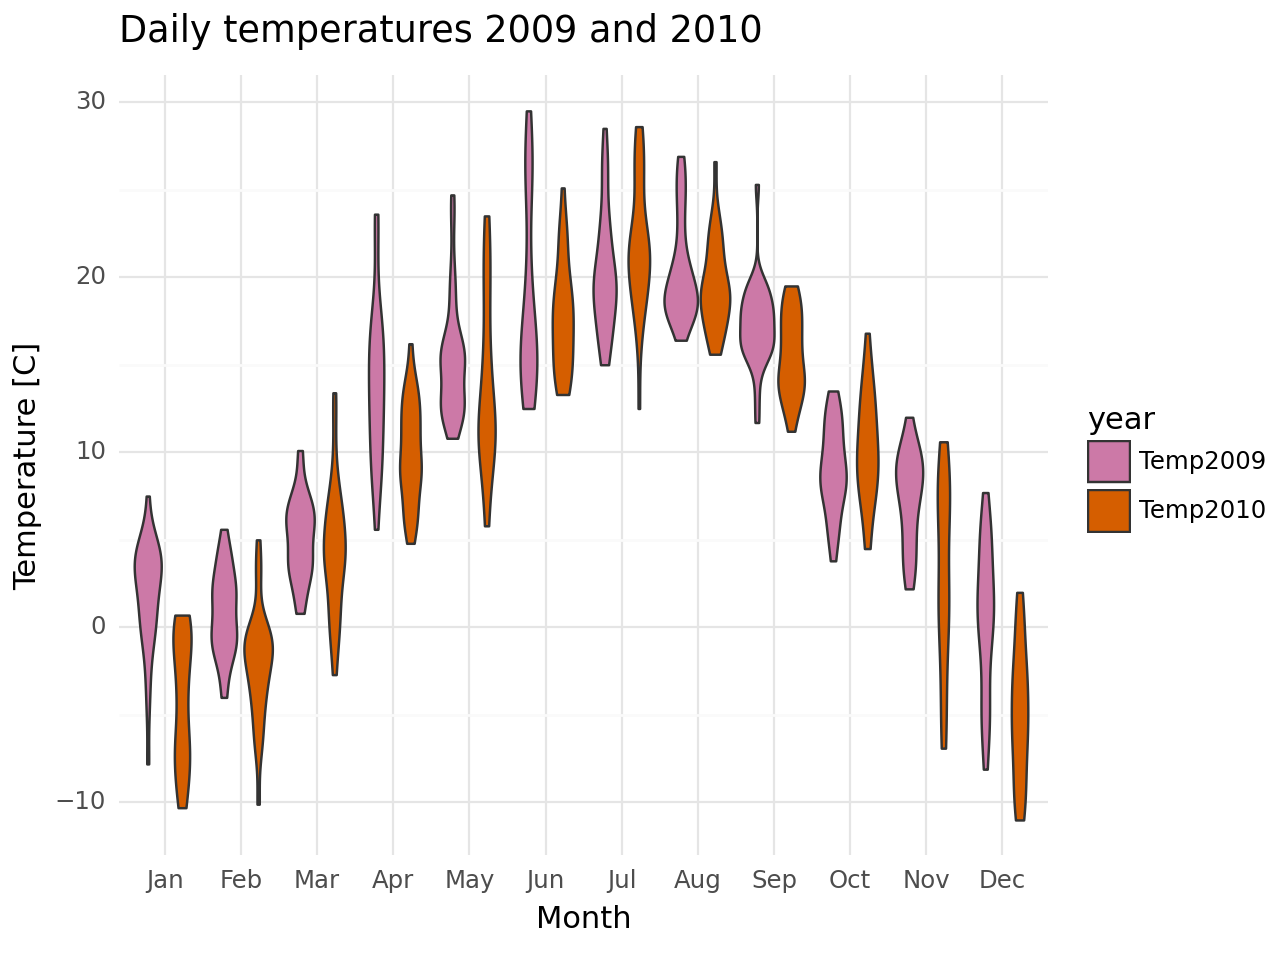

<Figure Size: (640 x 480)>

In [13]:
# Insert code here using violin plot with dots
#Yixuan
p5 = (ggplot(data3, aes("month", "temperature",fill = "year"))
    + geom_violin()
    + scale_fill_manual(values=[cbPalette[6], cbPalette[5]]) 
    + labs(y = "Temperature [C]", x = "Month", title="Daily temperatures 2009 and 2010")
    + theme_minimal())

p5
# Remember to print the visual 

**Briefly discuss the drawback with each approach (standard errors, boxplots, and violin plots).**

_Your answer here_

Standard error is the simplest way to visualize many distributions at once, using points to show their mean or median and error bars to indicate the range of variation around the mean or median. Because the meaning of error bars can be ambiguous in realworld datasets, we will introduce two alternative methods. Box plots are information-rich, easy to understand, and simple to draw by hand, making them ideal for plotting next to each other to visualize multiple distributions at the same time. Violin plots, on the other hand, provide a more detailed representation of the data. They can accurately represent bimodal data, something box plots cannot achieve.

One of the drawbacks with a violin plot is that it can be hard to read summary statistics from it. Produce a violin plot visual here, where you have also drawn the median for each violin, as well as the data points. 

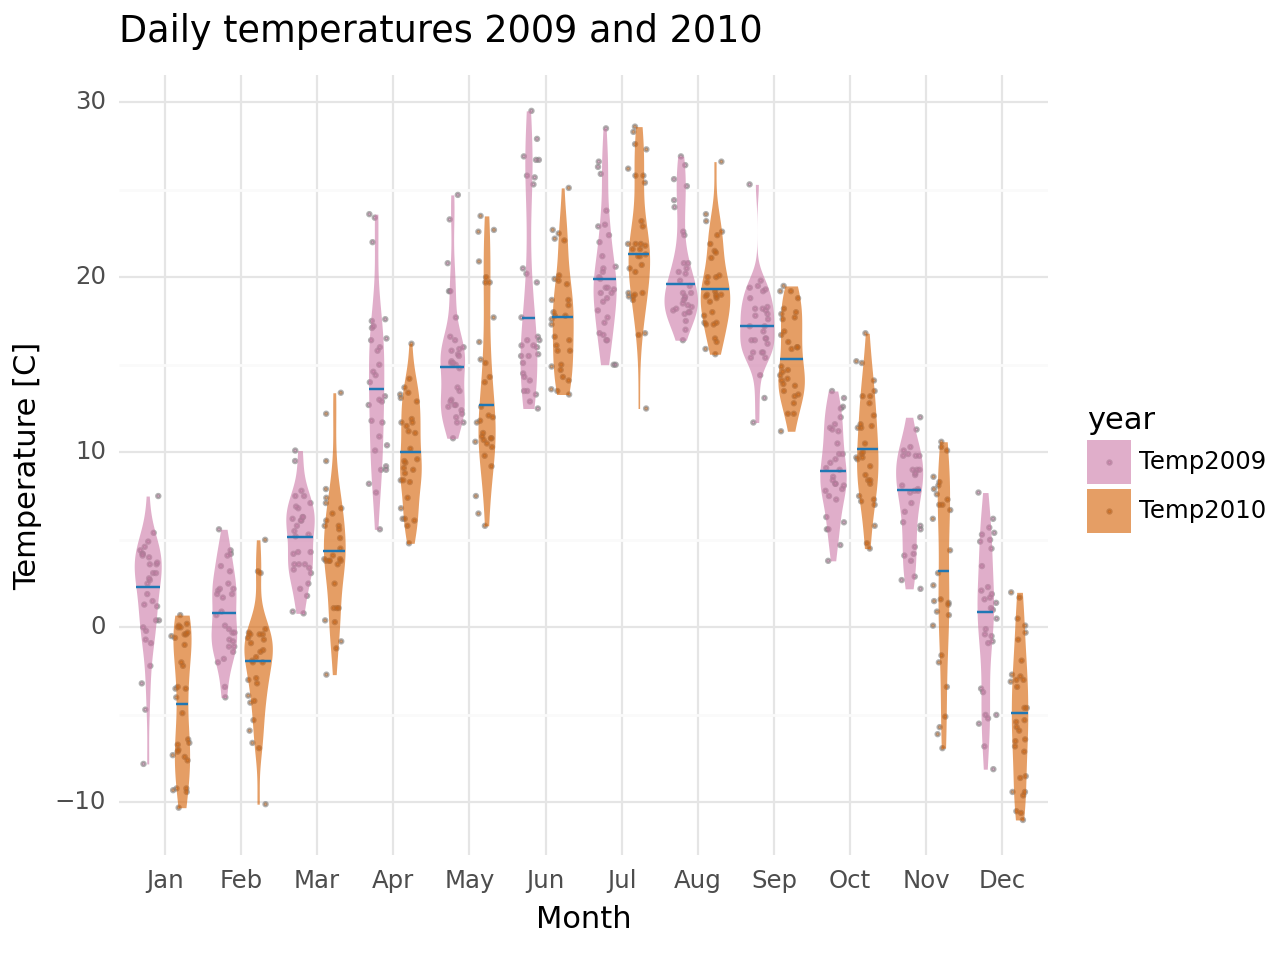

<Figure Size: (640 x 480)>

In [14]:
# Insert code here using violin plot with dots and median line
#Yixuan
p6 = (ggplot(data3, aes("month", "temperature",fill = "year"))
    + geom_jitter(size=0.3, color="grey", alpha=0.6, position=position_jitterdodge(jitter_width=0.25, dodge_width=0.8))
    + geom_violin(alpha=0.6, color=None, draw_quantiles=[0.5])
    + scale_fill_manual(values=[cbPalette[6], cbPalette[5]]) 
    + labs(y = "Temperature [C]", x = "Month", title="Daily temperatures 2009 and 2010")
    + theme_minimal())

p6
# Remember to print the visual 

**Briefly discuss how you could make it easy for the reader to understand that the line the visual represent the median.**

_Your answer here_

### Question 3.3

Some people argue that visuals should be as minimal as possible. On the webpage you have a bad example of a minimalist way to plot the min, median, and max temperature of each month in 2009 and 2010 using the dataset in Question 3.2 (where you hopefully have filtered out daily temperatures for 2009 and 2010). By **only** using geom\_point recreate the visual (you do not need to recreate the title). **You are not allowed to transform the dataset**.

*Hint - Remember the stat argument in ggplot*

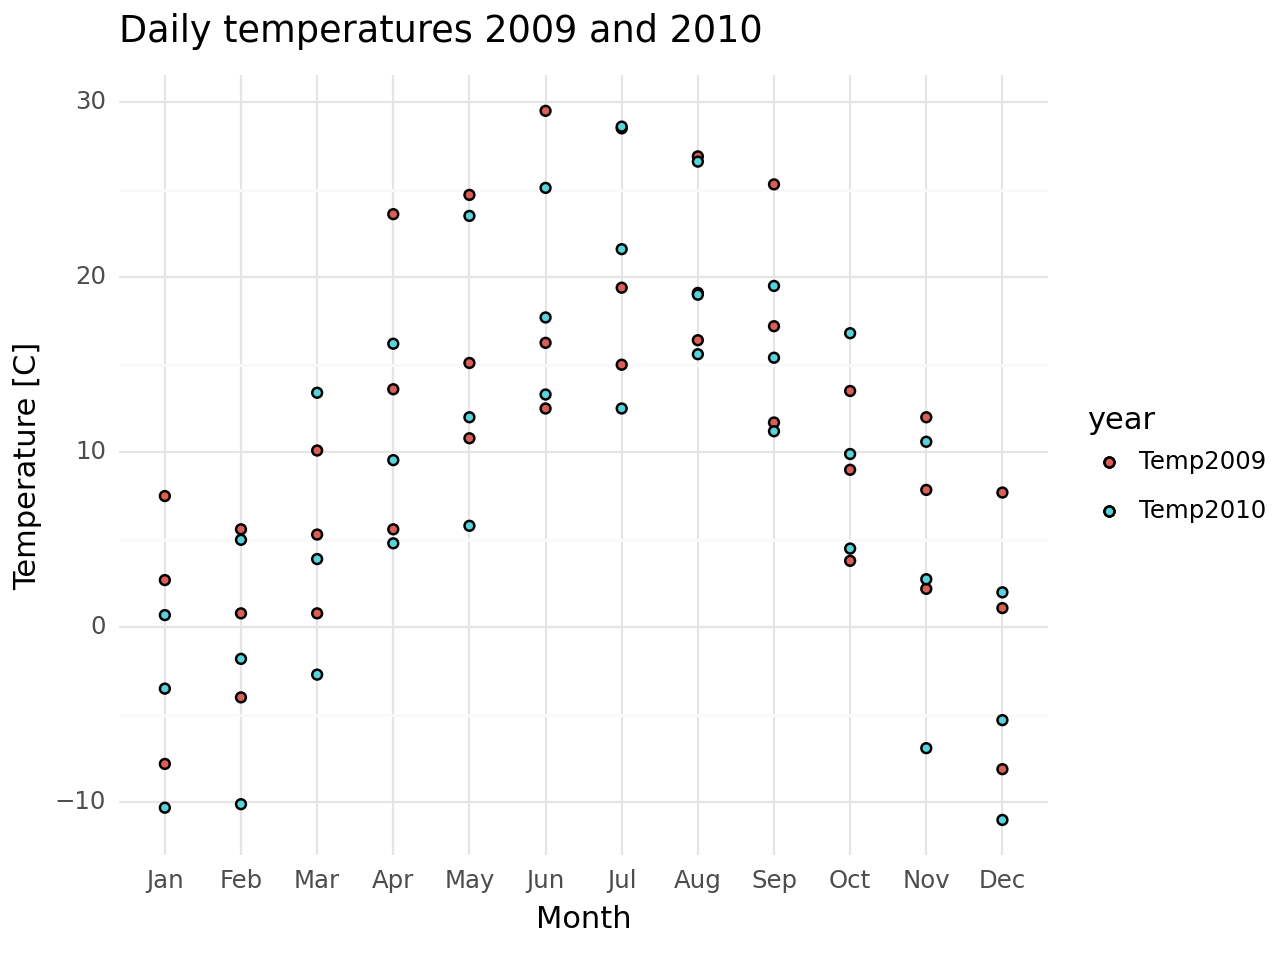

<Figure Size: (640 x 480)>

In [16]:
# Insert code here 

#Yixuan
p7 = (ggplot(data3, aes(x="month", y="temperature", fill = "year"))
    + geom_point(stat="summary", fun_y = np.min)
    + geom_point(stat="summary", fun_y = np.max) 
    + geom_point(stat="summary", fun_y = np.median)
    + scale_color_manual(values=[cbPalette[6], cbPalette[5]])
    + labs(y = "Temperature [C]", x = "Month", title="Daily temperatures 2009 and 2010")
    + theme_minimal())


p7

# Remember to print the visual 

**Motivate how you can improve the plot.**

_Your answer here_

### Question 3.4

Using the full weather dataset on the webpage create two plots of your on choice. For example, you can compare winter temperatures across years, differences in night and day temperatures etc. For each visual provide a brief motivation on why your choice of visual (e.g violin or boxplot) is a good choice.

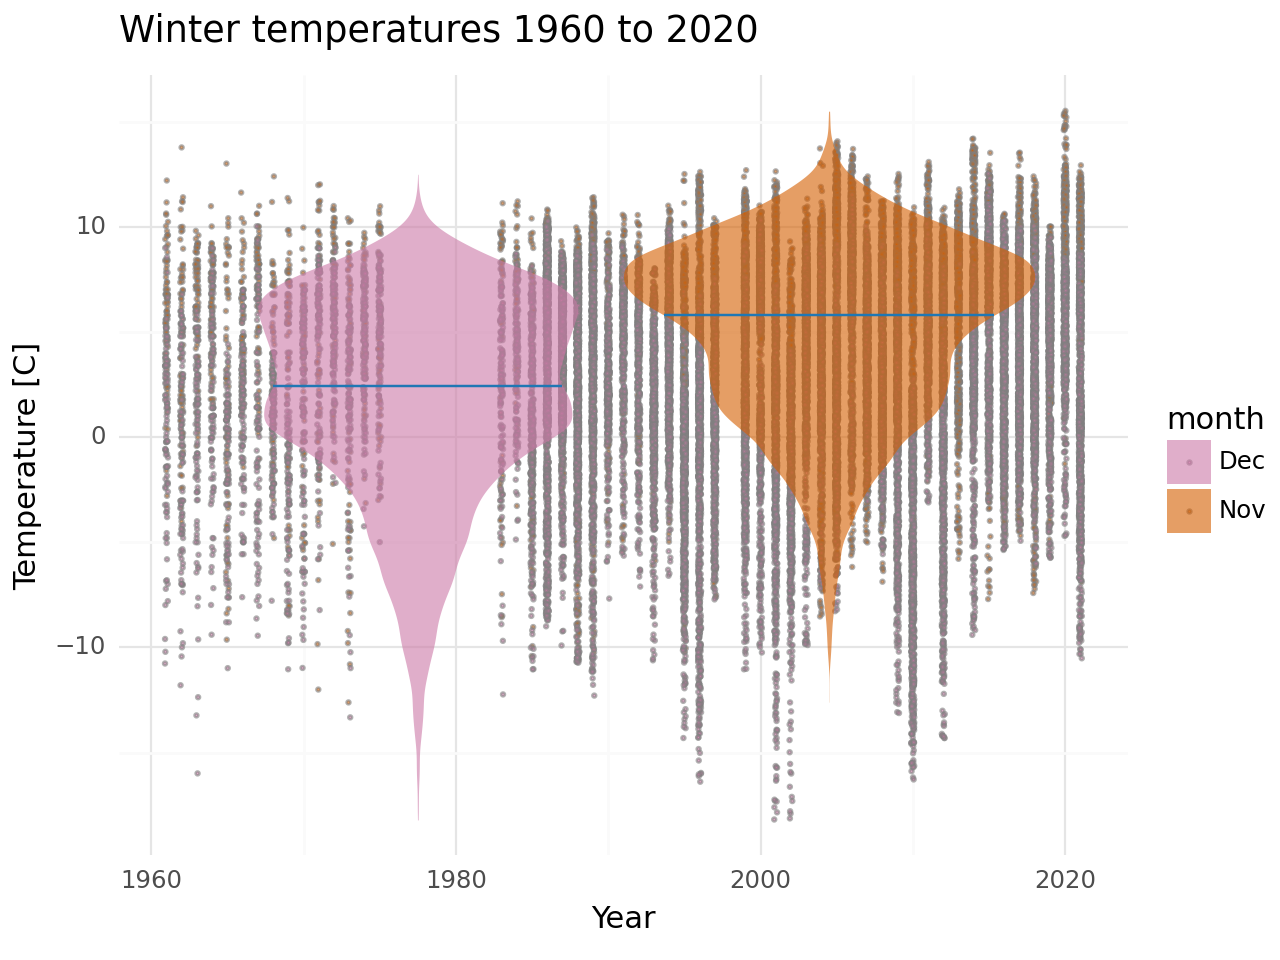

<Figure Size: (640 x 480)>

In [100]:
# Insert code here 
data5 = pd.read_csv('Weather_tidy_full.csv')

winter_months = ["Nov", "Dec"]
data6 = data5[data5["month"].isin(winter_months)]

p4 =(ggplot(data6, aes("year", "Temperature",fill = "month"))
    + geom_jitter(width=0.1, size=0.3, color="grey", alpha=0.6)
    + geom_violin(alpha=0.6, color=None, draw_quantiles=[0.5])
    + scale_fill_manual(values=[cbPalette[6], cbPalette[5]]) 
    + labs(y = "Temperature [C]", x = "Year", title="Winter temperatures 1960 to 2020")
    + theme_minimal())

p4

# Remember to print the visual 

*Brief motivation*

In [13]:
# Insert code here 
# Remember to print the visual 

*Brief motivation*

## Amounts 

For this part reading Chapter 6 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 4.1 

Barplots are the workhorse for plotting amounts. Create a dataframe with the values from Tab. 6.1 in the [course book](https://clauswilke.com/dataviz/visualizing-amounts.html), and recreate Fig. 6.1 and Fig. 6.3 in the course book.

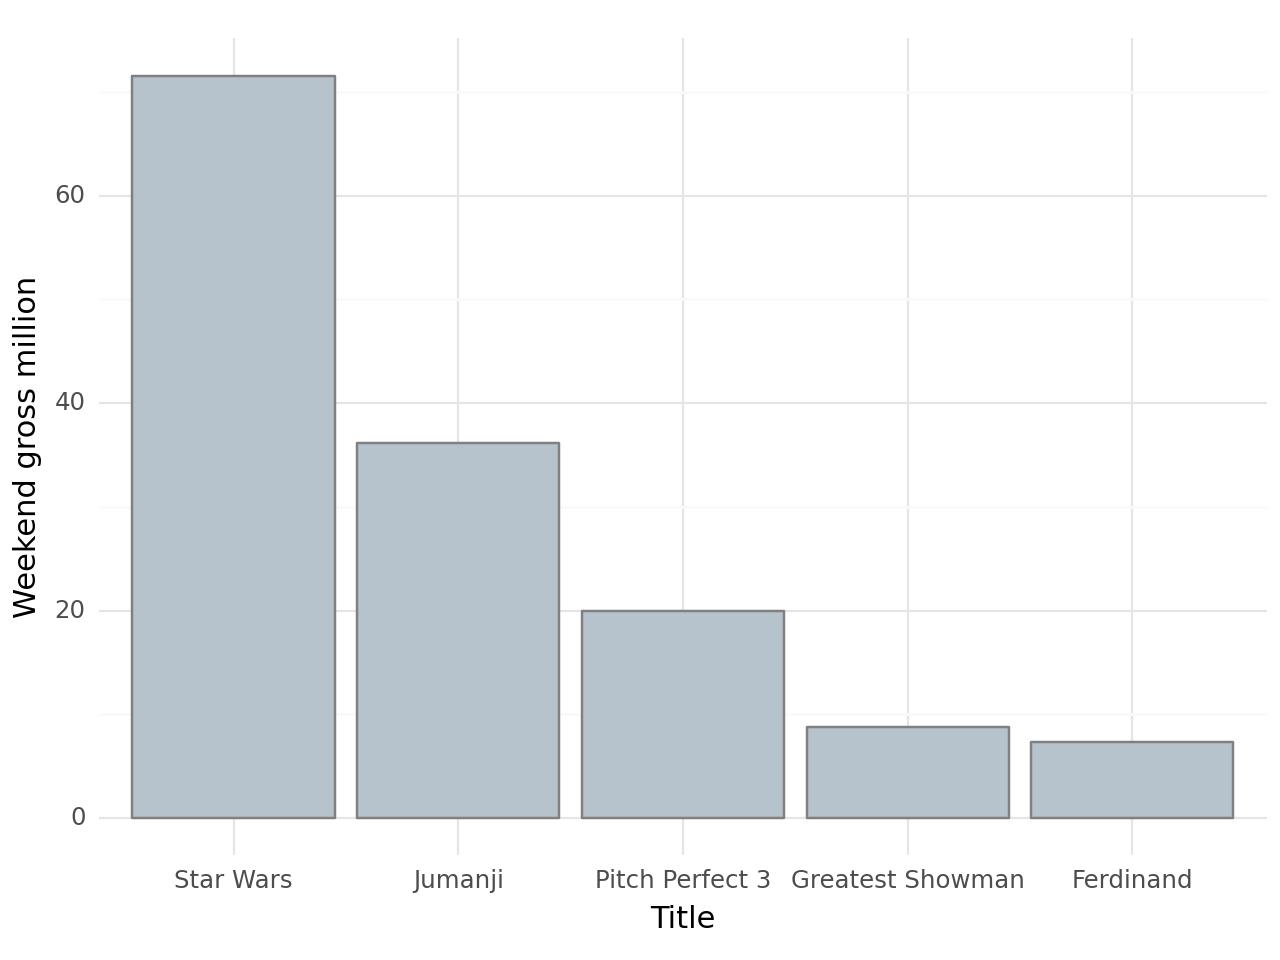

<Figure Size: (640 x 480)>

In [141]:
# Insert code here for Fig. 6.1
#Yixuan
data8 = {
    "Rank": [1, 2, 3, 4, 5],
    "Title": pd.Categorical(
        ["Star Wars", "Jumanji", "Pitch Perfect 3", "Greatest Showman", "Ferdinand"],
        categories=desired_order,
        ordered=True),
    "Weekend gross": [71565498,36169328,19928525,8805843,7316746]
}

data9 = pd.DataFrame(data8)
data9["Weekend gross million"] = data9["Weekend gross"] / 1000000
p9 = (ggplot(data9, aes(x="Title", y="Weekend gross million"))
    + geom_bar(stat = "identity", position = "dodge", color="grey", fill=col_use[0])
    + theme_minimal())
p9

# Remember to print the visual 

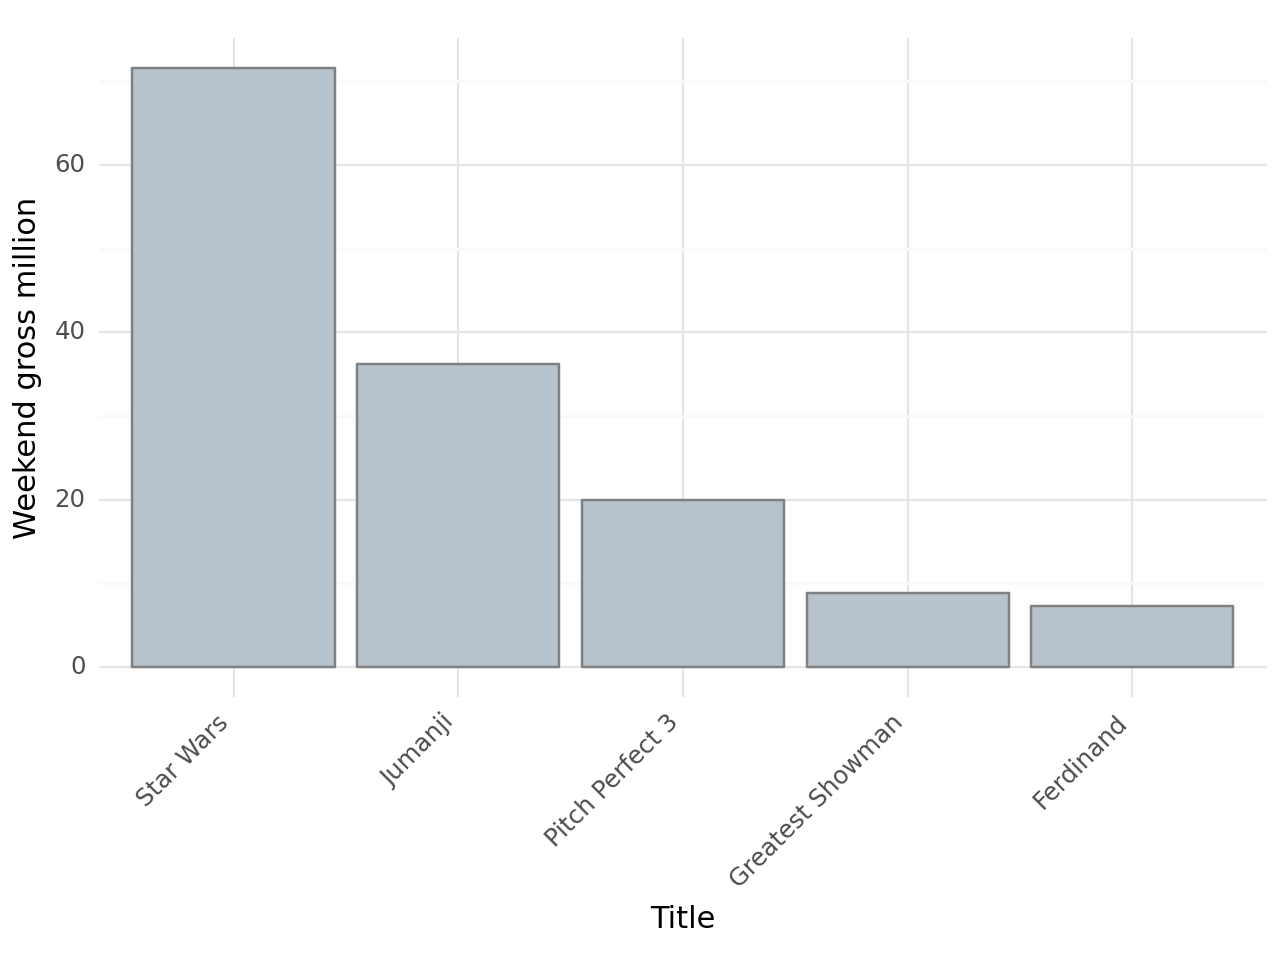

<Figure Size: (640 x 480)>

In [140]:
# Insert code here for Fig. 6.2
#Yixuan
p10 = (ggplot(data9, aes(x="Title", y="Weekend gross million"))
    + geom_bar(stat = "identity", position = "dodge", color="grey", fill=col_use[0])
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=45, hjust=1)))
p10
# Remember to print the visual 

### Question 4.2 

Often we want to highlight a specific column in a barplot. Using the same layout as in the most recent plot highlight the column of Jumanji in orange, and keep the remaining columns grey.

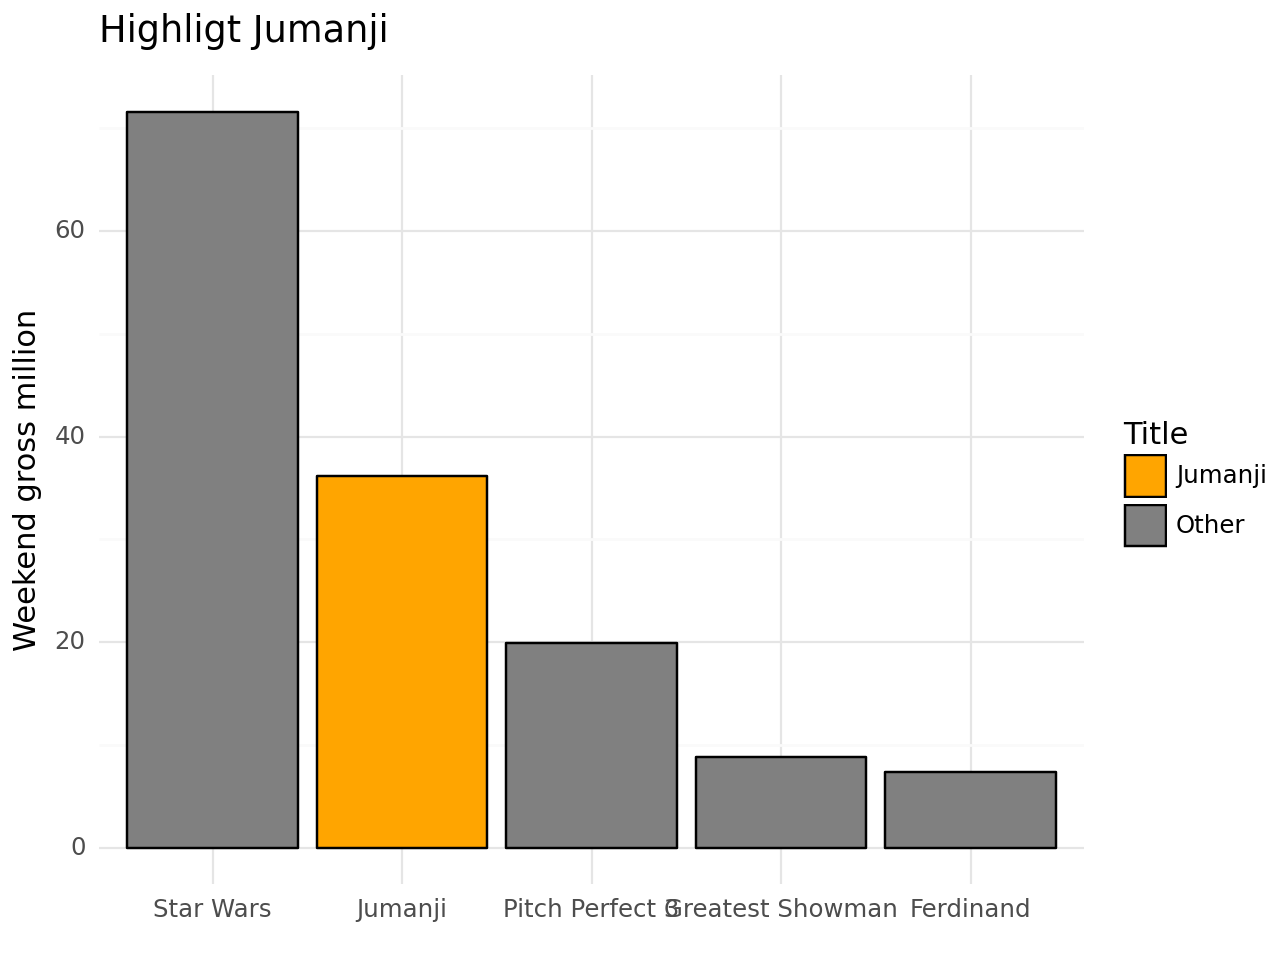

<Figure Size: (640 x 480)>

In [148]:
# Insert code here 
#Yixuan
p11 = (ggplot(data9, aes(x="Title", y="Weekend gross million", fill=data9["Title"].apply(lambda x: "Jumanji" if x=="Jumanji" else "Other")))
    + geom_bar(stat="identity", position="dodge", color="black")
    + scale_fill_manual(values={"Jumanji": "orange", "Other": "grey"})
    + labs(x = "", title = "Highligt Jumanji")
    + theme_minimal())
       
p11
# Remember to print the visual 

Besides using colours to highlight, adding numbers for the highlighted category can also help. For the Jumanji column also add the number that the bar corresponds to.

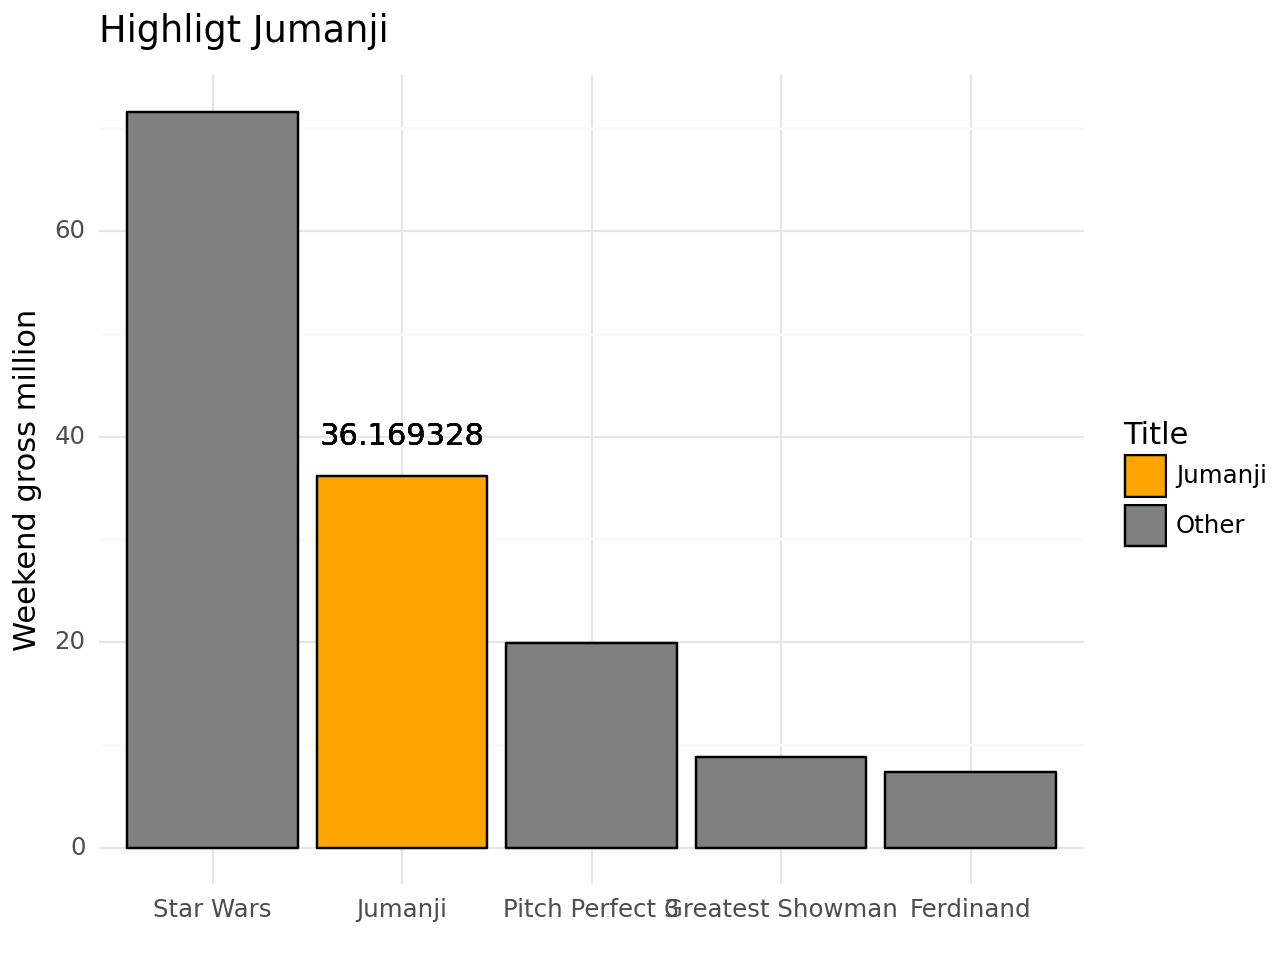

<Figure Size: (640 x 480)>

In [150]:
# Insert code here 
#Yixuan
p12 = (ggplot(data9, aes(x="Title", y="Weekend gross million", fill=data9["Title"].apply(lambda x: "Jumanji" if x=="Jumanji" else "Other")))
    + geom_bar(stat="identity", position="dodge", color="black")
    + geom_text(aes(x = 2, y = 40, label = "36.169328"))
    + scale_fill_manual(values={"Jumanji": "orange", "Other": "grey"})
    + labs(x = "", title = "Highligt Jumanji")
    + theme_minimal())

p12
# Remember to print the visual 

### Question 4.3

On the webpage, I have uploaded a dataset on the number of marriages in Stockholm, Gothenburg, Malmo and rest of Sweden for 2020, 2015, 2010 and 2005. Using this dataset, produce i) a visual where it is easy to see which year Stockholm had the second most marriages, and ii) a visual where it is easy to see how many more marriages there was in Stockholm compared to Gothenburg in 2015. **In each visual, I want you to include the number of marriages for each city and year**. 

In [18]:
# Insert code here for part i)
# Remember to print the visual 

In [19]:
# Insert code here for part ii)
# Remember to print the visual 

Motivate how you made the two mentioned cases above clear in your plots.

_Your answer here_

### Question 4.4

When plotting the mobile operating system data in the lectures, I used a classical barplot. Another way which makes it easy to track the trend over several years or across companies is a common line-plot. Using the dataset on the webpage recreate the present on the webpage.

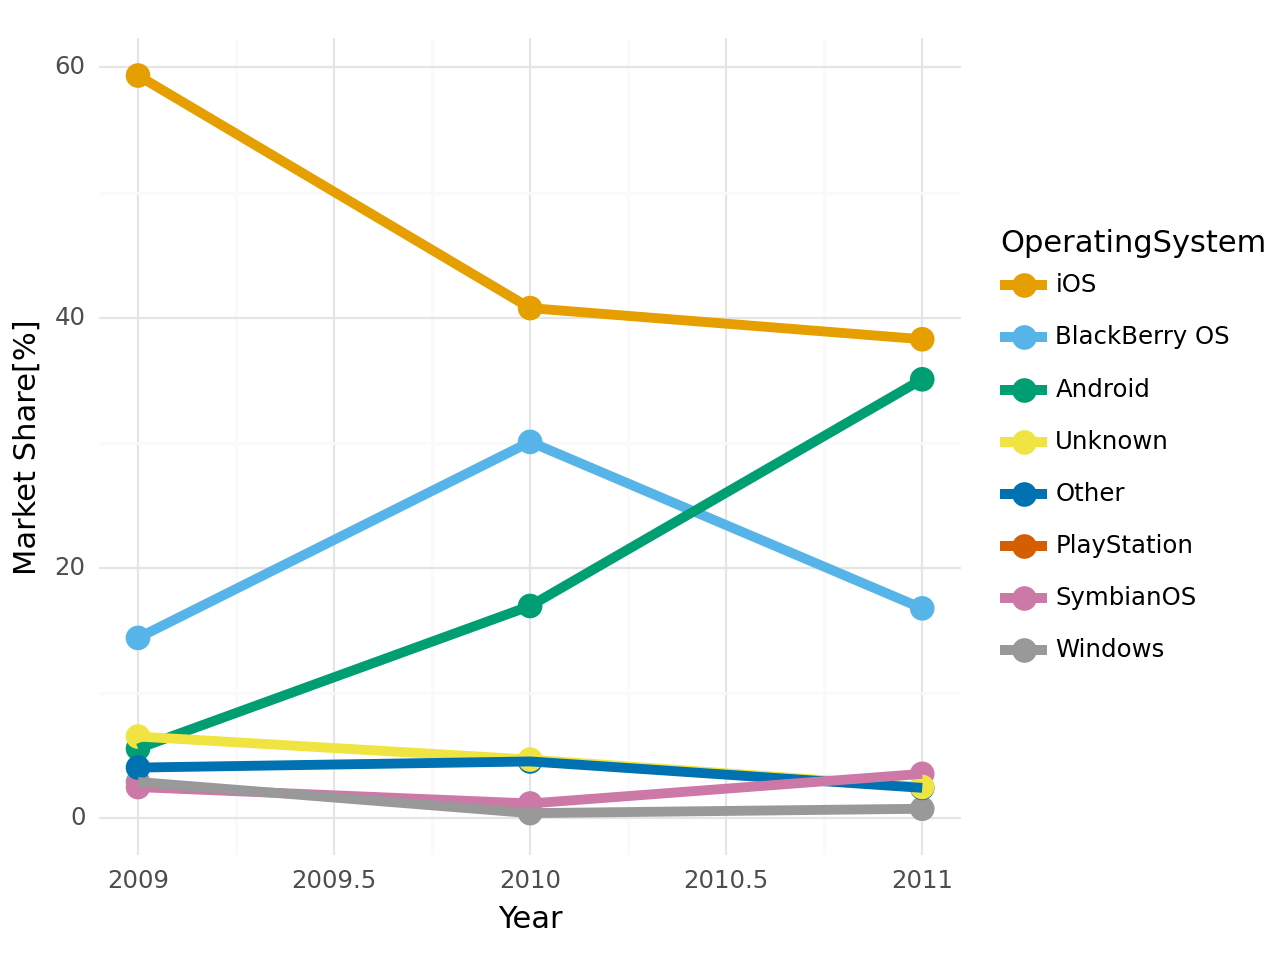

<Figure Size: (640 x 480)>

In [36]:
# Insert code here 
#Yixuan
data_mobil = pd.read_csv('mobile_os_market_share.csv')
data_mobil["OperatingSystem"] = pd.Categorical(data_mobil["OperatingSystem"],
    categories=["iOS","BlackBerry OS","Android","Unknown","Other","PlayStation","SymbianOS","Windows"],ordered=True)
data_mobil = data_mobil.dropna(subset=["OperatingSystem"])
p11 = (ggplot(data_mobil, aes(x="Year", y="Share", color = "OperatingSystem")) 
    + geom_point(size=4.0)
    + geom_line(size=2.0)
    + xlim(2009, 2011) 
    + labs(x = "Year", y = "Market Share[%]")
    + scale_color_manual(values = cbPalette, name = "OperatingSystem") 
    + theme_minimal())
p11
# Remember to print the visual 

By default plotnine places the legend for a visual to the right, or bottom depending on a theme. Do you think having a legend next to the visual is the best solution?

__Write answer here__

#Yixuan
Yes, matching the legend order to the data order and having a legend nest to the visual is helpful. It makes reading information very convenient.

### Question 4.5

In the lecture, I provided data on European nations median lifespan. Now using the full dataset provided on the webpage, select a subset of countries and visualise i) life-expectancy across a timespan of your choice and ii) life expectancy in 2020. Provide a brief motivation for your choice of visual - and why your choice is readable.



In [21]:
# Insert code here for part1 
# Remember to print the visual 

*Brief motivation*

In [22]:
# Insert code here for part2 
# Remember to print the visual 

*Brief motivation*